# Constrained Optimization

In [1]:
import numpy as np

from optiland import optic, optimization

Define a starting lens:

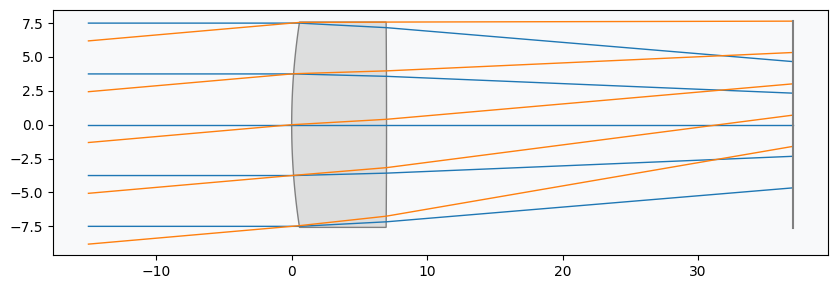

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, thickness=np.inf)
lens.add_surface(index=1, thickness=7, radius=50, material="N-KF9", is_stop=True)
lens.add_surface(index=2, thickness=30, radius=-1000)
lens.add_surface(index=3)

# set aperture
lens.set_aperture(aperture_type="EPD", value=15)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)
lens.add_field(y=5)

# add wavelength
lens.add_wavelength(value=0.55, is_primary=True)

# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [ ]:
# 1. add focal length operand
input_data = {"optic": lens}
problem.add_operand(operand_type="f2", target=50, weight=1, input_data=input_data)

# 2. add seidel coefficient 1 operand
input_data = {"optic": lens, "seidel_number": 1}
problem.add_operand(operand_type="seidel", target=0, weight=1, input_data=input_data)

# 3. add RMS spot size operand
input_data = {
    "optic": lens,
    "surface_number": -1,
    "Hx": 0,
    "Hy": 0,
    "num_rays": 5,
    "wavelength": 0.55,
    "distribution": "hexapolar",
}

problem.add_operand(
    operand_type="rms_spot_size",
    target=0,
    weight=1,
    input_data=input_data,
)

Define variables - constrain first radius:

In [5]:
problem.add_variable(lens, "radius", surface_number=1, min_val=25, max_val=100)
problem.add_variable(lens, "radius", surface_number=2)

Let thickness to image surface vary:

In [6]:
problem.add_variable(lens, "thickness", surface_number=2)

Check initial merit function value and system properties:

In [7]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                1677.84 │                 0 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════╤═════════════╤═════════════╤════════════════════╕
│    │ Operand Type   │   Target │   Weight │       Value │       Delta │   Contribution (%) │
╞════╪════════════════╪══════════╪══════════╪═════════════╪═════════════╪════════════════════╡
│  0 │ f2             │       50 │        1 │ 90.8039     │ 40.8039     │       99.2323      │
│  1 │ seidel         │        0 │        1 │ -0.00851671 │ -0.00851671 │        4.32307e-06 │
│  2 │ rms spot size  │        0 │        1 │  3.58907    │  3.58907    │        0.767738    │
╘════╧════════════════╧══════════╧══════════╧═════════════╧═════════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤═════════╤══════════════╤══════════════

Define optimizer:

In [8]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [9]:
optimizer.optimize(tol=1e-6)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.00469683088966835
        x: [-7.492e-01  3.976e+00  3.419e+00]
      nit: 29
      jac: [ 5.230e-02 -2.422e-04 -2.830e-04]
     nfev: 140
     njev: 35
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization:

In [10]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │             0.00469683 │           99.9997 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════╤════════════╤══════════════╤════════════════════╕
│    │ Operand Type   │   Target │   Weight │      Value │        Delta │   Contribution (%) │
╞════╪════════════════╪══════════╪══════════╪════════════╪══════════════╪════════════════════╡
│  0 │ f2             │       50 │        1 │ 50.0004    │  0.000354064 │         0.00266906 │
│  1 │ seidel         │        0 │        1 │ -0.0556716 │ -0.0556716   │        65.9876     │
│  2 │ rms spot size  │        0 │        1 │  0.0399672 │  0.0399672   │        34.0097     │
╘════╧════════════════╧══════════╧══════════╧════════════╧══════════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤══════════╤══════════════╤═════════════

Draw final lens:

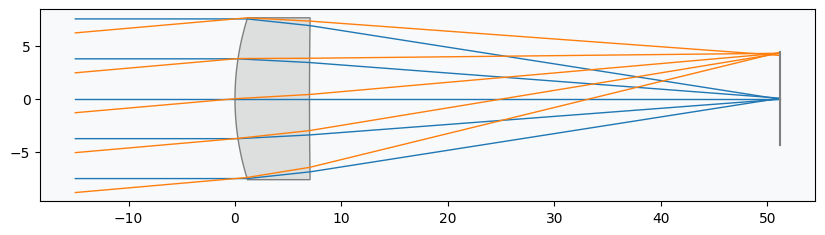

In [11]:
lens.draw(num_rays=5)